<a href="https://colab.research.google.com/github/muppiit/PengolahanCitra_dan_VisiKomputer/blob/main/Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

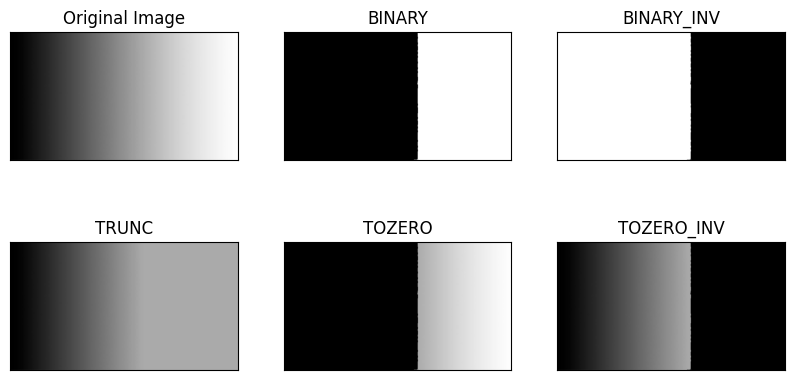

In [3]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/gradient.jpg')

threshold = 170
max_value = 255

# BINARY Threshold
def binary_threshold(image, threshold, max_value):
    result = np.where(image > threshold, max_value, 0)
    return result

# BINARY_INV Threshold
def binary_inv_threshold(image, threshold, max_value):
    result = np.where(image > threshold, 0, max_value)
    return result

# TRUNC Threshold
def trunc_threshold(image, threshold):
    result = np.where(image > threshold, threshold, image)
    return result

# TOZERO Threshold
def tozero_threshold(image, threshold):
    result = np.where(image > threshold, image, 0)
    return result

# TOZERO_INV Threshold
def tozero_inv_threshold(image, threshold):
    result = np.where(image > threshold, 0, image)
    return result

# Terapkan semua threshold ke gambar
thresh1 = binary_threshold(image, threshold, max_value)
thresh2 = binary_inv_threshold(image, threshold, max_value)
thresh3 = trunc_threshold(image, threshold)
thresh4 = tozero_threshold(image, threshold)
thresh5 = tozero_inv_threshold(image, threshold)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(10,5))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

Otsu’s threshold value: 185


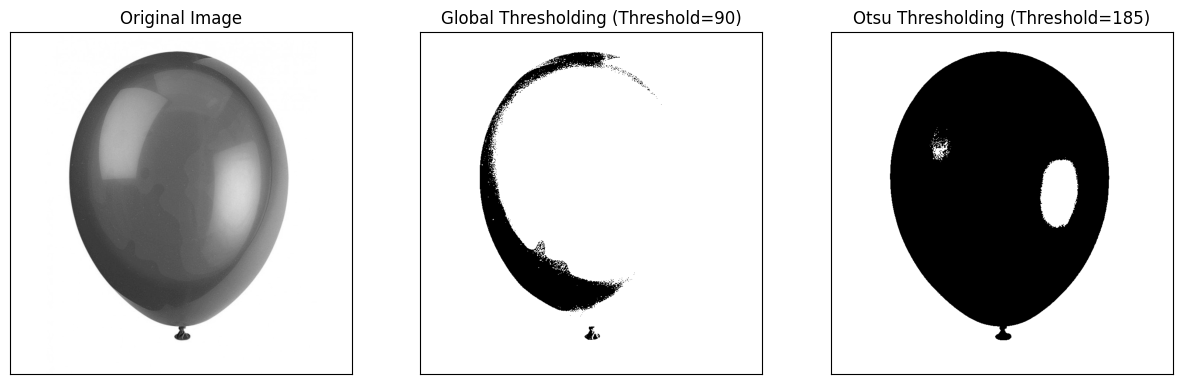

In [4]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Fungsi untuk menghitung histogram
def calculate_histogram(image):
    histogram = np.zeros(256)
    for pixel in image.ravel():  # Menggunakan ravel untuk flat array
        histogram[pixel] += 1
    return histogram

# Fungsi untuk menghitung Otsu's Threshold
def otsu_threshold(image):
    histogram = calculate_histogram(image)
    total_pixels = image.size
    sum_total = np.dot(np.arange(256), histogram)  # Total intensitas
    sumB, wB, wF = 0, 0, 0
    max_variance = 0
    threshold = 0
    for t in range(256):
        wB += histogram[t]  # Berat (Weight) background
        if wB == 0:
            continue
        wF = total_pixels - wB  # Berat (Weight) foreground
        if wF == 0:
            break
        sumB += t * histogram[t]
        mB = sumB / wB  # Rata-rata background
        mF = (sum_total - sumB) / wF  # Rata-rata foreground
        variance_between = wB * wF * (mB - mF) ** 2
        if variance_between > max_variance:
            max_variance = variance_between
            threshold = t
    return threshold

# Terapkan Otsu's Threshold
otsu_thresh_value = otsu_threshold(image)
print(f'Otsu’s threshold value: {otsu_thresh_value}')

# Fungsi untuk menerapkan threshold
def apply_threshold(image, threshold):
    return np.where(image > threshold, 255, 0)

# Global Thresholding (tanpa Otsu)
global_thresh_value = 90  # Threshold global standar
global_thresh_image = apply_threshold(image, global_thresh_value)

# Otsu's Thresholding
otsu_thresh_image = apply_threshold(image, otsu_thresh_value)

# Menampilkan hasil
titles = ['Original Image', f'Global Thresholding (Threshold={global_thresh_value})', f'Otsu Thresholding (Threshold={otsu_thresh_value})']
images = [image, global_thresh_image, otsu_thresh_image]

plt.figure(figsize=(15,8))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

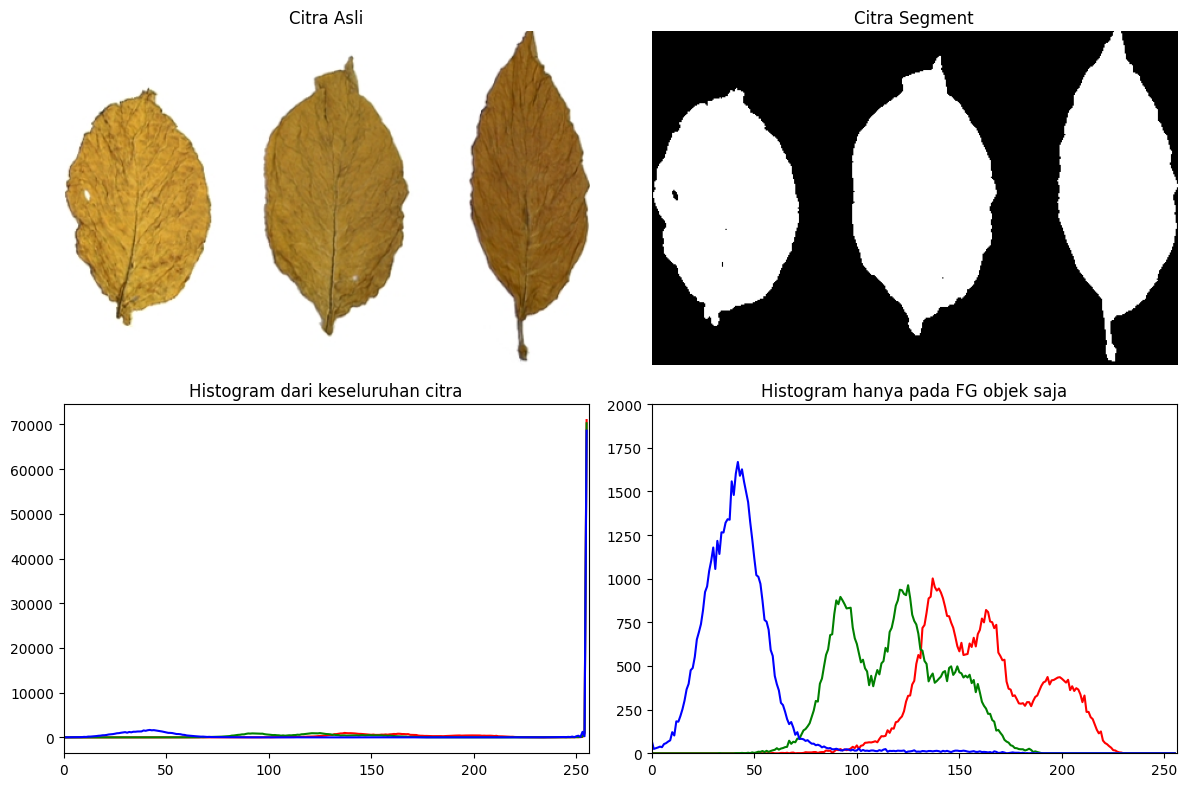

In [5]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/tobacco.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah ke format RGB

# Segmentasi citra menggunakan threshold
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Hitung threshold Otsu
threshold_value, _ = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan threshold Otsu dengan inversi
_, mask = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY_INV)


# Masking foreground
foreground = cv2.bitwise_and(image, image, mask=mask)

# Menghitung histogram untuk keseluruhan citra
hist_full_r = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_full_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_full_b = cv2.calcHist([image], [2], None, [256], [0, 256])

# Menghitung histogram hanya pada foreground
hist_fg_r = cv2.calcHist([image], [0], mask, [256], [0, 256])
hist_fg_g = cv2.calcHist([image], [1], mask, [256], [0, 256])
hist_fg_b = cv2.calcHist([image], [2], mask, [256], [0, 256])

# Menampilkan citra asli dan hasil segmentasi
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')

# Menampilkan histogram untuk keseluruhan citra
plt.subplot(2, 2, 3)
plt.plot(hist_full_r, color='r')
plt.plot(hist_full_g, color='g')
plt.plot(hist_full_b, color='b')
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Menampilkan histogram untuk foreground (dari mask)
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r')
plt.plot(hist_fg_g, color='g')
plt.plot(hist_fg_b, color='b')
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])
plt.ylim([0,2000])

# Tampilkan plot
plt.tight_layout()
plt.show()

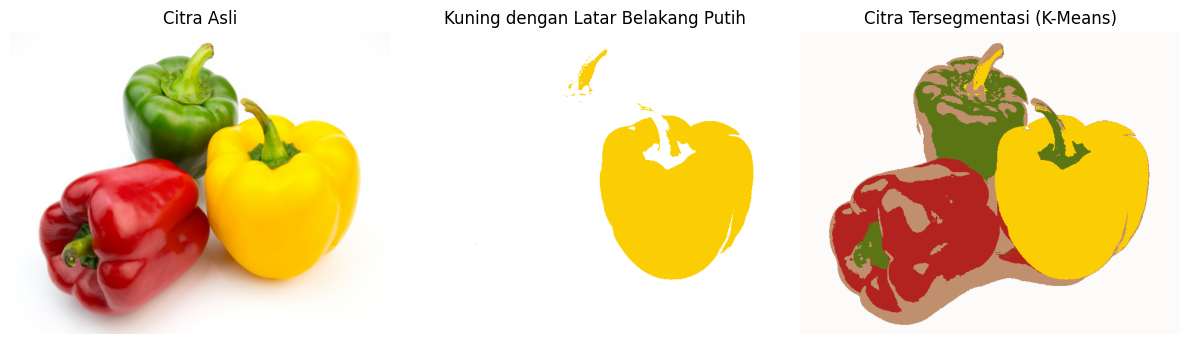

In [9]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/peppers.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah ke format RGB

# Mengubah citra menjadi 2D array untuk K-Means
pixel_values = image.reshape((-1, 3))  # Bentuk ulang menjadi barisan 2D
pixel_values = np.float32(pixel_values)  # Mengubah ke tipe float

# Menentukan k (jumlah cluster) dan kriteria untuk K-Means
k = 5  # Kita akan mencari 5 warna utama
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Mengaplikasikan K-Means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi pusat ke uint8 (0-255)
centers = np.uint8(centers)

# Menghasilkan citra segmented
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Mengkonversi citra ke ruang warna HSV untuk mendeteksi warna kuning
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2HSV)

# Menentukan rentang warna kuning dalam ruang warna HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Membuat mask untuk warna kuning
mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Menerapkan mask pada citra tersegmentasi
yellow_segmented = cv2.bitwise_and(segmented_image, segmented_image, mask=mask)

# Membuat latar belakang putih
background = np.ones_like(segmented_image, dtype=np.uint8) * 255  # Membuat citra berwarna putih

# Kombinasikan citra hasil segmentasi kuning dengan background putih
yellow_on_white = np.where(mask[:, :, np.newaxis] == 0, background, yellow_segmented)

# Menampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(yellow_on_white)
plt.title('Kuning dengan Latar Belakang Putih')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Citra Tersegmentasi (K-Means)')
plt.axis('off')

plt.tight_layout()
plt.show()

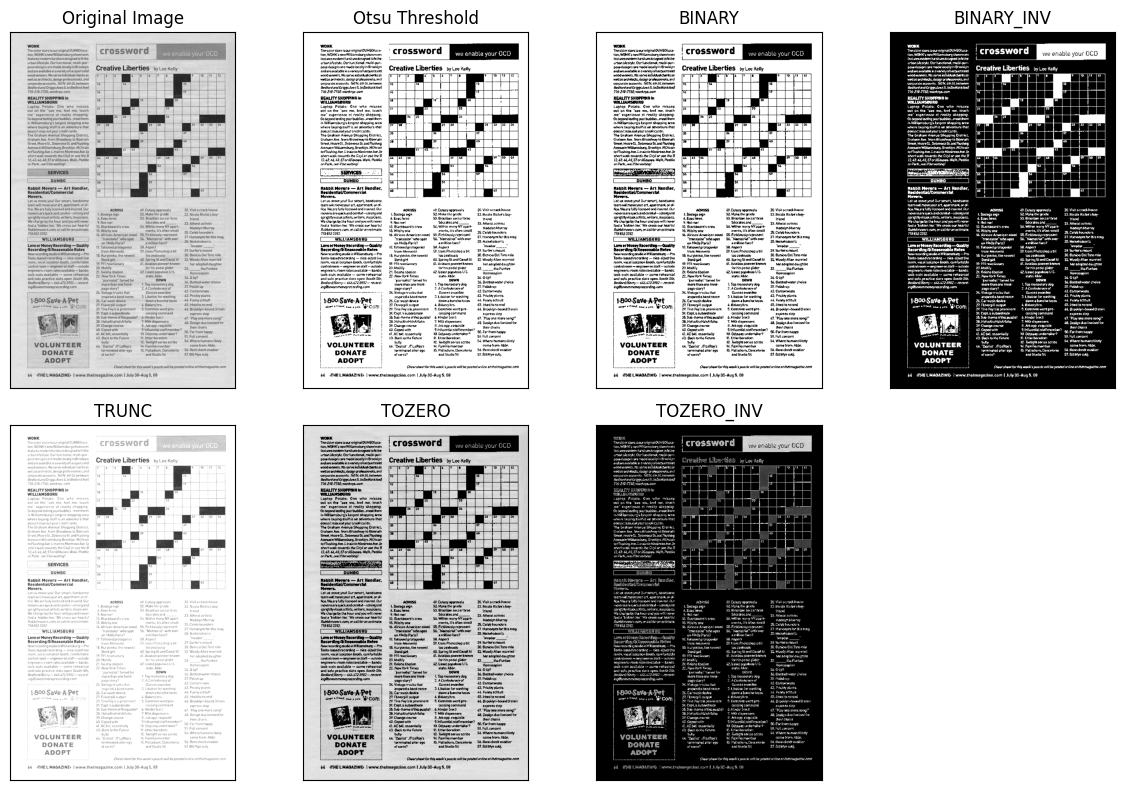

In [10]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/crossword.jpg', cv2.IMREAD_GRAYSCALE)

# Nilai threshold dan nilai maksimum
threshold = 170
max_value = 255

# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# BINARY Threshold
def binary_threshold(image, threshold, max_value):
    result = np.where(image > threshold, max_value, 0)
    return result

# BINARY_INV Threshold
def binary_inv_threshold(image, threshold, max_value):
    result = np.where(image > threshold, 0, max_value)
    return result

# TRUNC Threshold
def trunc_threshold(image, threshold):
    result = np.where(image > threshold, threshold, image)
    return result

# TOZERO Threshold
def tozero_threshold(image, threshold):
    result = np.where(image > threshold, image, 0)
    return result

# TOZERO_INV Threshold
def tozero_inv_threshold(image, threshold):
    result = np.where(image > threshold, 0, image)
    return result

# Terapkan semua threshold ke gambar crossword
thresh1 = binary_threshold(image, threshold, max_value)
thresh2 = binary_inv_threshold(image, threshold, max_value)
thresh3 = trunc_threshold(image, threshold)
thresh4 = tozero_threshold(image, threshold)
thresh5 = tozero_inv_threshold(image, threshold)

titles = ['Original Image', 'Otsu Threshold', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, otsu_thresh, thresh1, thresh2, thresh3, thresh4, thresh5]

# Tampilkan semua hasil thresholding
plt.figure(figsize=(12, 8))

for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
